![](fig/logoENSI.png)
 ![](fig/logoPython.png)
***
# TP9
Compte-rendu de 

# Classes - POO
***
**ENSICAEN  1A MC**  2022

## Eric Ziad-Forest
***

**Auteur :**

- Eric Ziad-Forest [ziad@ensicaen.fr]
***
*Contenu sous licence [CC BY-SA 4.0](https://creativecommons.org/licenses/by-sa/4.0)*

### Enseignants des groupes de TD/TP
- Groupe 1: Philippe Lefebvre [lefebvre@ensicaen.fr]
- Groupe 2: Tanguy Gernot [tanguy.gernot@ensicaen.fr]
- Groupe 3: Christine Porquet [chris@ensicaen.fr]
- Groupe 4: Eric Ziad-Forest [ziad@ensicaen.fr] 
***

# Classes

Ce TP a pour but de vous familiariser avec la notion de classes, qui permet de créer ses propres objets. Pour savoir comment on construit une classe, vous pouvez vous référer au cours et au lien suivant :

- [tutoriel officiel Python](https://docs.python.org/2/tutorial/classes.html#a-first-look-at-classes)

<!--
Quelques remarques :
- une classe doit forcément contenir la fonction `__init__(self, ...)` qui sert à construire l'objet proprement dit avec des arguments donnés (les `...`),er
- si on veut afficher cet objet, il faut rajouter la méthode `__str__(self)` qui va renvoyer une chaine de caractères représentant l'objet.
-->

## Polygones et cercles

### Polygones

Un polygone peut être représenté par une liste de points dans le plan. Pour cela, on va définir des structures (appellées classes) pour manipuler simplement des polygones. 

**Attention** : pour cet exercice, tout le code sera à écrire dans la cellule ci-dessous.

In [70]:
from math import *

class Point():
    def __init__(self, abscisse, ordonnee):
        self.x, self.y = abscisse, ordonnee
    
    def __str__(self):
        return "(" + str(self.x) + ", " + str(self.y) + ")"
    
    def egal_a(self, other):
        if self.x == other.x and self.y == other.y:
            return True
        return False
    
    def distance(self, other):
        return sqrt((self.x - other.x)**2 - (self.y - other.y)**2)

class Polygone:
    
    def __init__(self, points):
        self.points = points[:]
        self.taille = points
    
    def __str__(self):
        s = "["
        for i in range(len(self.points)):
            if i==len(self.points)-1:
                s += str(self.points[i])
            else:
                s += str(self.points[i])+", "
        return s +"]"
    def __len__(self):
        return len(self.taille)
    
    def position_sommet(p):
        for i in range(len(self.points)):
            if self.points[i].egal_a(p) :
                return i
        return
            
    def ajouter(self, pt):
        if self.position_sommet(pt)==None:
            self.points.append(pt)
    
    def supprimer(self, pt):
        x = self.position_sommet(pt)
        if x != None:
            self.points.pop(x)
   

* Un point est défini par son abscisse `x` et son ordonnée `y`. On veut pouvoir initialiser les coordonnées d'un point, et afficher un point sous forme de chaîne de caractères. Complétez, dans la cellule ci-dessus, l'ébauche de classe `Point`, en y ajoutant une méthode `initialise(self, abscisse,   ordonnee)` ne renvoyant rien, et une méthode `vers_chaine(self)` renvoyant une chaîne de caractères. Exemple d'utilisation :

In [71]:
pt = Point(0,2)
print(pt)  # doit afficher (0, 2)


(0, 2)


* À votre avis, à quoi sert le mot-clé `self` ?

self désigne l'objet sur lequel la méthode lst est appelée.

* On veut maintenant regarder si 2 points sont égaux. Pour cela, ajouter la méthode `egal_a(self, other)` qui renvoie `True` si les 2 points en arguments sont égaux, et `False` sinon. Par exemple :

In [72]:
pt2 = Point(0, 2)
print(pt.egal_a(pt2))  # doit afficher True
pt2 = Point(0, 1)
print(pt.egal_a(pt2))  # doit afficher False

True
False


* Ajoutez à la classe `Point` une méthode `distance(self, other)` renvoyant la distance entre les deux points. Vous pourrez utiliser la fonction `sqrt` du module `math`.

* On va maintenant compléter la classe `Polygone` ébauchée ci-dessus. Les objets de type `Polygone` seront caractérisés par une liste d'objets `Point`. Ajoutez dans la définition de la classe `Polygone` la méthode `initialise(self, points)` servant à initialiser la liste des points d'un polygone.

* Il serait utile de savoir si un `Point` fait partie des sommets d'un `Polygon`. Malheureusement, l’opérateur `in` ne fonctionnera pas directement avec notre type `Point`. Rajoutez ci-dessus une méthode `position_sommet(p)` qui renvoie la position du `Point p` dans la liste de sommets si `p` s’y trouve, et `None` sinon.

* Ajoutez à la classe `Polygone` les méthodes `ajouter(self, pt)` qui ajoute un `Point` `pt` à la liste de points s’il ne s’y trouve pas encore, et `supprimer(self, pt)` qui le supprime s’il s’y trouve. L’ajout se fait en fin de liste.

* Ajoutez à la classe `Polygon` la méthode `vers_chaine(self)` pour transformer un polygone en chaîne de caractères, par exemple comme ceci :

In [78]:
pt3 = Point(1, 1)
poly = Polygone([pt, pt2, pt3])
print(poly)  # doit afficher [(0, 2), (0, 1), (1, 1)]
x = []

[(0, 2), (0, 1), (1, 1)]


Une manière plus experte de manipuler des objets que l'on a créés est de définir des méthodes spéciales, qui permettent d'utiliser les opérateurs et fonctions de base de Python sur ces objets. On pourrait par exemple écrire :

In [76]:
poly = Polygone([Point(0,0), Point(0, 1), Point(0, 2)])
print(poly, len(poly))
print(Point(0, 1) in poly)

[(0, 0), (0, 1), (0, 2)] 3


TypeError: argument of type 'Polygone' is not iterable

* Cherchez dans la documentation officielle les méthodes spéciales qu'il est possible de redéfinir pour que ce code fonctionne, et écrivez une nouvelle version de vos classes en conséquence.

  **Indication** : cherchez à quoi servent les méthodes `__init__`, `__str__`, `__len__`, etc. C'est détaillé par exemple sur [cette page](https://docs.python.org/3/reference/datamodel.html#special-method-names).

### Cercles

* Ecrivez une classe `CercleSimple` permettant de représenter un cercle sur base de son centre et de son rayon. N'oubliez pas de rajouter une méthode spéciale pour pouvoir afficher le cercle avec `print`.

In [60]:
from math import *

class CercleSimple(Point):
    def __init__(self,Point,rayon):
        self.y = Point
        self.x=rayon
    
    def __str__(self):
        return "cercle de centre "+ str(self.y) +" et de rayon " + str(self.x)
    
    def perimetre(self):
        return 2*pi*(self.x)
    
    def aire(self):
        return pi*((self.x)**2)
    

C = CercleSimple(Point(0,1), 2)
print(C)  # doit afficher par exemple : "cercle de centre (0,2) et de rayon 2"

cercle de centre (0, 1) et de rayon 2


* Rajoutez les méthodes `aire(self)` et `perimetre(self)`, qui renverront les valeurs correspondantes (vous pouvez utiliser la constante `pi` du module `math`).

## Détection de collisions

On va maintenant raisonner en terme de collisions, comme dans un jeu vidéo. Notre univers sera simplement composé de cercles et de rectangles. 

### Affichage à l'écran : cercles

En guise d'échauffement, affichons à l'écran des cercles. Pour cela, on va utiliser le paquet `matplotlib` qui contient sa propre définition d'un cercle et d'un rectangle. Nous allons "coller" par-dessous notre définition précédente.

On va ici visualiser des cercles et des rectangles à l'aide de l'outil `matplotlib` (déjà utilisé en TP pour tracer des courbes). On vous fournit le code ci-dessous, redéfinissant la classe `Cercle`. 

**Remarque :** Ce code utilise le mécanisme d'héritage. Sa compréhension en détail n'est pas exigible dans ce cours.

In [69]:
import matplotlib.patches as patches
class Cercle(patches.Circle):
    def __init__(self, centre, rayon, **kwargs):
        patches.Circle.__init__(self, (centre.x,centre.y), rayon, **kwargs)
        self.centre = centre
        self.rayon = rayon
        
    def collision(self, cercle):
         if self.rayon == 0:
                return True
            
C = Cercle(0,2)
C.init()
print(C)

AttributeError: 'int' object has no attribute 'x'

* Avec cette classe `Cercle`, affichez 2 cercles dans le code ci-dessous en plus du cercle bleu :
  - un cercle en vert qui n'est pas en collision avec le cercle bleu,
  - un cercle en rouge qui est en collision avec le cercle bleu.

TypeError: object() takes no parameters

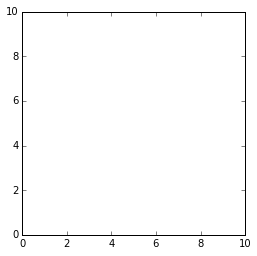

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.patches as p

fig = plt.figure()

ax = fig.add_subplot(111, aspect='equal')
ax.set_xlim([0,10])
ax.set_ylim([0,10])

cercles = [
    Cercle(Point(3, 3), 3, color="blue")
    # ajoutez d'autres cercles ici !
]

for c in cercles:
    ax.add_patch(c)

### Collisions entre cercles

* Rajoutez dans la classe `Cercle` une fonction qui indique si un cercle est en collision avec un autre (souvenez-vous que vous avez déjà programmé le calcul de la distance entre deux objets `Point` !).

  Testez la fonction avec les 3 cercles de la question précédente.

In [12]:
assert(cercles[0].collision(cercles[1])) == False
assert(cercles[0].collision(cercles[2]))== True

NameError: name 'cercles' is not defined

### Affichage : rectangles

On va cette fois-ci afficher un rectangle. Un rectangle est défini par un `Point` (sommet haut-gauche), une largeur et une hauteur. 

On vous fournit le code suivant. Comme précédemment, la compréhension détaillée de la méthode `__init__` n'est pas exigée.

In [ ]:
import matplotlib.patches as patches
class Rectangle(patches.Rectangle):
    def __init__(self, coin, largeur, hauteur, **kwargs):
        patches.Rectangle.__init__(self, (coin.x, coin.y), largeur, hauteur, **kwargs)
        self.coin = coin
        self.largeur = largeur
        self.hauteur = hauteur
        
    def collision(self, rect):
        """ À compléter plus tard."""

* Comme précédemment, affichez 2 autres rectangles :
  - un vert n'étant pas en collision avec le rectangle bleu,
  - un rouge en collision avec le rectangle bleu.

In [ ]:
fig = plt.figure()

ax = fig.add_subplot(111, aspect='equal')
ax.set_xlim([0,10])
ax.set_ylim([0,10])

rects = [
    Rectangle(Point(3, 1), 5, 2, color="blue")
]

for r in rects:
    ax.add_patch(r)

* Ajoutez une méthode `collision` à la classe `Rectangle` qui renvoie `True` si le rectangle considéré est en collision avec le second `Rectangle`. Cette fois-ci, vous n'avez pas besoin d'utiliser la méthode donnant la distance entre deux objets `Point`.

In [ ]:
assert(rects[0].collision(rects[1])) == False
assert(rects[0].collision(rects[2]))== True

## En guise de conclusion

Vous avez vu une première approche pour détecter des collions : entre 2 cercles, entre 2 rectangles. Cependant, dans la plupart des jeux vidéos, on ne manipule pas des rectangles ou des cercles mais des personnages complexes. 

À votre avis, comment peut-on réutiliser les résultats du TP pour savoir si un personnage rentre dans un obstacle ?